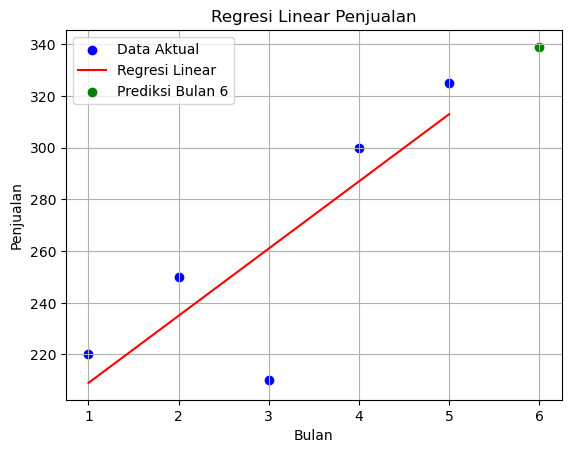

   Bulan  Penjualan Aktual  Penjualan Terprediksi
0      1             220.0                  209.0
1      2             250.0                  235.0
2      3             210.0                  261.0
3      4             300.0                  287.0
4      5             325.0                  313.0
5      6               NaN                  339.0
MAPE: 8.66%


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Data penjualan
bulan = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Bulan 1 sampai 5
penjualan = np.array([220, 250, 210, 300, 325])   # Penjualan untuk bulan 1 sampai 5

# Membuat model regresi linear
model = LinearRegression()
model.fit(bulan, penjualan)

# Prediksi penjualan untuk bulan berikutnya (bulan 6)
bulan_prediksi = np.array([[6]])
penjualan_prediksi = model.predict(bulan_prediksi)

# Visualisasi data asli dan prediksi
plt.scatter(bulan, penjualan, color='blue', label='Data Aktual')
plt.plot(bulan, model.predict(bulan), color='red', label='Regresi Linear')
plt.scatter(bulan_prediksi, penjualan_prediksi, color='green', label='Prediksi Bulan 6')
plt.title('Regresi Linear Penjualan')
plt.xlabel('Bulan')
plt.ylabel('Penjualan')
plt.legend()
plt.grid(True)
plt.show()

# Membuat prediksi untuk tiap bulan 1 hingga 6
bulan_untuk_peramalan = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
penjualan_terprediksi = model.predict(bulan_untuk_peramalan)

# Membuat tabel hasil peramalan
data_hasil_peramalan = {
    'Bulan': [1, 2, 3, 4, 5, 6],
    'Penjualan Aktual': [220, 250, 210, 300, 325, None],  # None untuk bulan 6 karena aktual belum ada
    'Penjualan Terprediksi': penjualan_terprediksi
}

df_hasil_peramalan = pd.DataFrame(data_hasil_peramalan)
print(df_hasil_peramalan)

# Menghitung MAPE
def hitung_mape(aktual, prediksi):
    # Menghilangkan nilai None atau nan pada penjualan aktual
    mask = ~np.isnan(aktual)
    return np.mean(np.abs((aktual[mask] - prediksi[mask]) / aktual[mask])) * 100

# Konversi ke numpy array dan hitung MAPE
penjualan_aktual = np.array([220, 250, 210, 300, 325, np.nan])  # Bulan 6 tidak memiliki penjualan aktual
penjualan_terprediksi = np.array(penjualan_terprediksi)

mape = hitung_mape(penjualan_aktual, penjualan_terprediksi)
print(f'MAPE: {mape:.2f}%')


   Bulan  Penjualan Aktual  Penjualan Terprediksi
0      1             220.0                  226.8
1      2             250.0                  240.3
2      3             210.0                  226.3
3      4             300.0                  277.6
4      5             325.0                  309.2
5      6               NaN                  309.2
MAPE: 5.41%


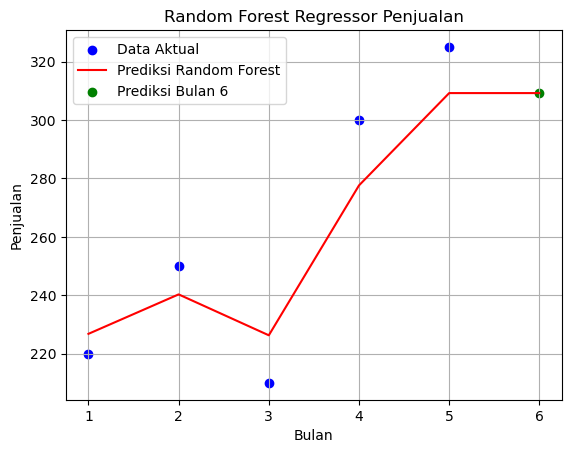

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Data peramalan 5 bulan
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Bulan (independent variable)
y = np.array([220, 250, 210, 300, 325])       # Penjualan (dependent variable)

# Membuat model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data
model.fit(X, y)

# Prediksi penjualan untuk bulan berikutnya (bulan 6)
X_pred = np.array([6]).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Membuat prediksi untuk semua bulan dari 1 hingga 6
X_test = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y_pred_all = model.predict(X_test)

# Tabel hasil peramalan
data_hasil_peramalan = {
    'Bulan': [1, 2, 3, 4, 5, 6],
    'Penjualan Aktual': [220, 250, 210, 300, 325, None],  # None untuk bulan ke-6 karena data aktual belum ada
    'Penjualan Terprediksi': y_pred_all
}

df_hasil_peramalan = pd.DataFrame(data_hasil_peramalan)
print(df_hasil_peramalan)

# Menghitung MAPE untuk bulan 1-5
penjualan_aktual = np.array([220, 250, 210, 300, 325])  # Hanya bulan 1-5 yang memiliki data aktual
penjualan_terprediksi = y_pred_all[:5]  # Hanya bulan 1-5 yang digunakan untuk perhitungan MAPE

mape = mean_absolute_percentage_error(penjualan_aktual, penjualan_terprediksi)
print(f'MAPE: {mape * 100:.2f}%')

# Visualisasi data asli dan prediksi
plt.scatter(X, y, color='blue', label='Data Aktual')
plt.plot(X_test, y_pred_all, color='red', label='Prediksi Random Forest')
plt.scatter(X_pred, y_pred, color='green', label='Prediksi Bulan 6')
plt.title('Random Forest Regressor Penjualan')
plt.xlabel('Bulan')
plt.ylabel('Penjualan')
plt.legend()
plt.grid(True)
plt.show()
